In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data = df.drop(['PassengerId','Name','Ticket'],axis=1)

In [4]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
data.shape

(891, 9)

In [6]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
[a-zA-Z]96

SyntaxError: invalid syntax (667668149.py, line 1)

In [8]:
data.Cabin = data.Cabin.astype('str')

In [9]:
import regex as re
def use_regex(input_text):
    pattern = re.search("([a-zA-Z])", input_text)
    return pattern.group(1)

In [10]:
data['Cabin_side'] = data.apply(lambda row: use_regex(row['Cabin']),axis=1)

In [11]:
data.drop(['Cabin'],axis=1,inplace=True)

In [12]:
data.Cabin_side.replace('n',np.NAN,inplace=True)

In [13]:
data.Cabin_side.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [14]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['Sex', 'Embarked', 'Cabin_side']


In [15]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' levels')

Sex  contains  2  levels
Embarked  contains  4  levels
Cabin_side  contains  9  levels


C:\Users\shara\AppData\Local\Temp\ipykernel_29684\2808442434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(), annot=True)


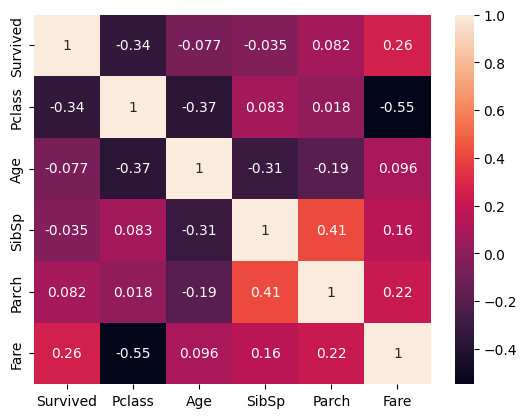

In [16]:
ax = sns.heatmap(data.corr(), annot=True)

In [17]:
# find numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [18]:
data[numerical].isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [19]:
print(round(data[numerical].describe()),2)

       Survived  Pclass    Age  SibSp  Parch   Fare
count     891.0   891.0  714.0  891.0  891.0  891.0
mean        0.0     2.0   30.0    1.0    0.0   32.0
std         0.0     1.0   15.0    1.0    1.0   50.0
min         0.0     1.0    0.0    0.0    0.0    0.0
25%         0.0     2.0   20.0    0.0    0.0    8.0
50%         0.0     3.0   28.0    0.0    0.0   14.0
75%         1.0     3.0   38.0    1.0    0.0   31.0
max         1.0     3.0   80.0    8.0    6.0  512.0 2


Text(0, 0.5, 'Fare')

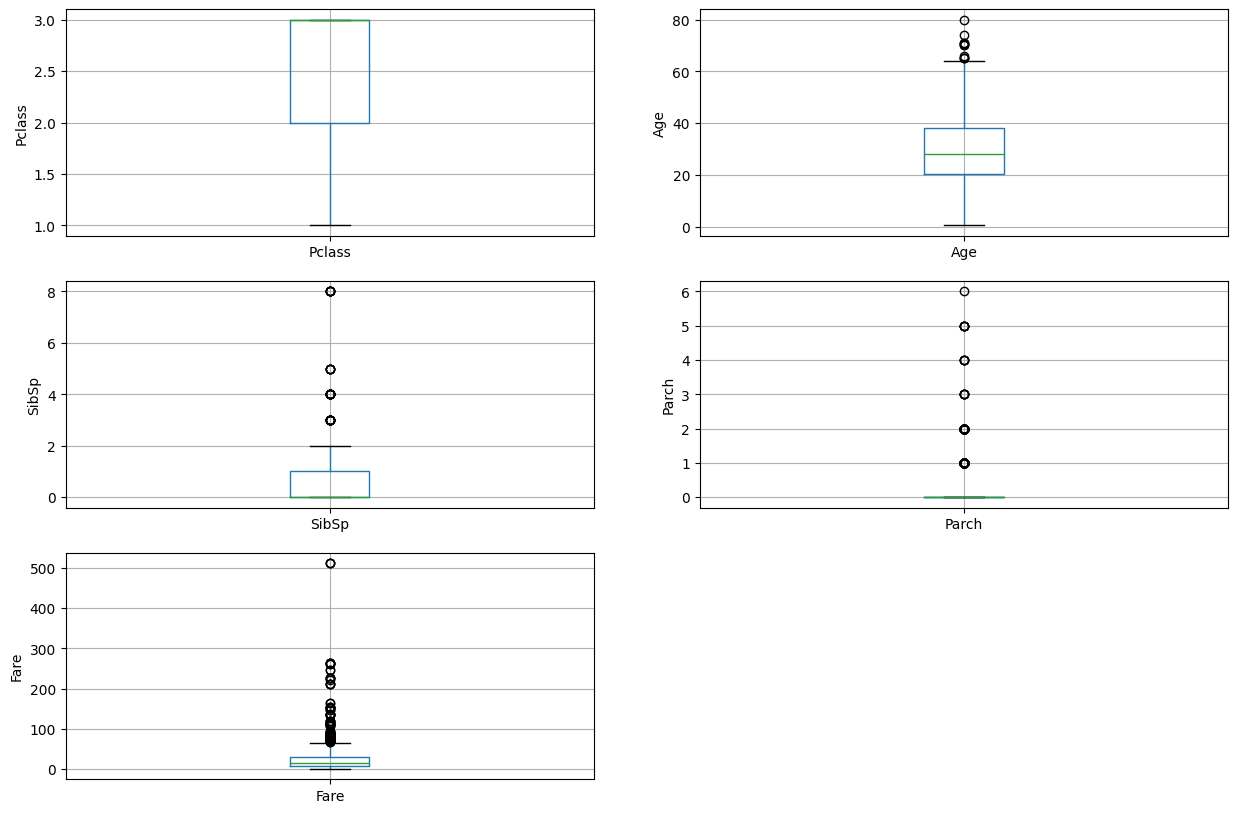

In [20]:
plt.figure(figsize=(15,10))


plt.subplot(3, 2, 1)
fig = data.boxplot(column='Pclass')
fig.set_title('')
fig.set_ylabel('Pclass')


plt.subplot(3, 2, 2)
fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')


plt.subplot(3, 2, 3)
fig = data.boxplot(column='SibSp')
fig.set_title('')
fig.set_ylabel('SibSp')


plt.subplot(3, 2, 4)
fig = data.boxplot(column='Parch')
fig.set_title('')
fig.set_ylabel('Parch')

plt.subplot(3, 2, 5)
fig = data.boxplot(column='Fare')
fig.set_title('')
fig.set_ylabel('Fare')



Text(0, 0.5, 'Survived')

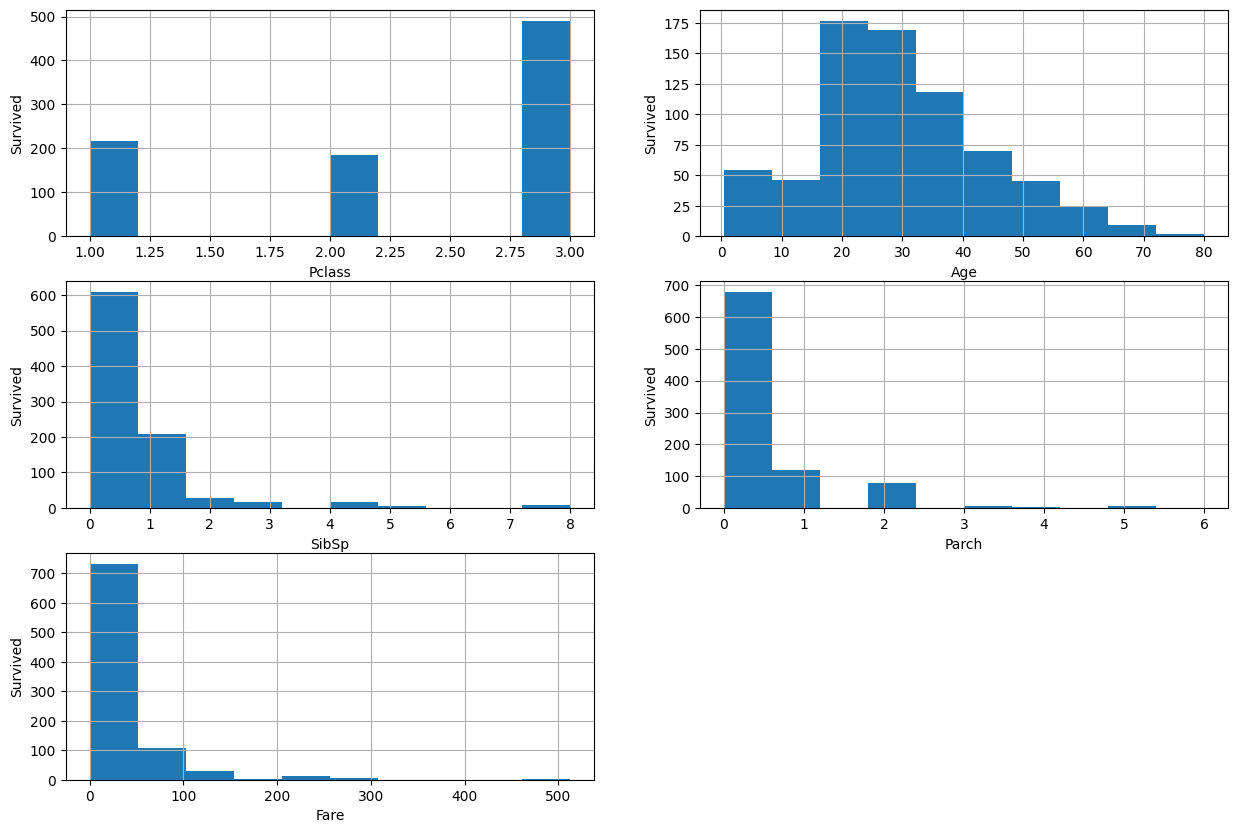

In [21]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(3, 2, 1)
fig = data.Pclass.hist(bins=10)
fig.set_xlabel('Pclass')
fig.set_ylabel('Survived')


plt.subplot(3, 2, 2)
fig = data.Age.hist(bins=10)
fig.set_xlabel('Age')
fig.set_ylabel('Survived')


plt.subplot(3, 2, 3)
fig = data.SibSp.hist(bins=10)
fig.set_xlabel('SibSp')
fig.set_ylabel('Survived')


plt.subplot(3, 2, 4)
fig = data.Parch.hist(bins=10)
fig.set_xlabel('Parch')
fig.set_ylabel('Survived')

plt.subplot(3, 2, 5)
fig = data.Fare.hist(bins=10)
fig.set_xlabel('Fare')
fig.set_ylabel('Survived')


In [22]:
# find outliers for Pclass variable

IQR = data.Pclass.quantile(0.75) - data.Pclass.quantile(0.25)
Lower_fence = data.Pclass.quantile(0.25) - (IQR * 3)
Upper_fence = data.Pclass.quantile(0.75) + (IQR * 3)
print('Pclass outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Pclass outliers are values < -1.0 or > 6.0


In [23]:
# find outliers for Age variable

IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)
Lower_fence = data.Age.quantile(0.25) - (IQR * 3)
Upper_fence = data.Age.quantile(0.75) + (IQR * 3)
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Age outliers are values < -33.5 or > 91.625


In [24]:
# find outliers for SibSp variable

IQR = data.SibSp.quantile(0.75) - data.SibSp.quantile(0.25)
Lower_fence = data.SibSp.quantile(0.25) - (IQR * 3)
Upper_fence = data.SibSp.quantile(0.75) + (IQR * 3)
print('SibSp outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

SibSp outliers are values < -3.0 or > 4.0


In [25]:
# find outliers for Parch variable

IQR = data.Parch.quantile(0.75) - data.Parch.quantile(0.25)
Lower_fence = data.Parch.quantile(0.25) - (IQR * 3)
Upper_fence = data.Parch.quantile(0.75) + (IQR * 3)
print('Parch outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Parch outliers are values < 0.0 or > 0.0


In [26]:
# find outliers for Fare variable

IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
Lower_fence = data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Fare outliers are values < -61.358399999999996 or > 100.2688


Feature Engineering

In [329]:
X = data.drop(['Survived'],axis =1)
y = data['Survived']

In [330]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 2)

In [331]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((712, 8), (179, 8))

In [332]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Sex', 'Embarked', 'Cabin_side']

In [333]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [334]:
X_train[numerical].isnull().sum()

Pclass      0
Age       148
SibSp       0
Parch       0
Fare        0
dtype: int64

In [335]:
X_test[numerical].isnull().sum()

Pclass     0
Age       29
SibSp      0
Parch      0
Fare       0
dtype: int64

In [336]:
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

Age 0.2079


In [337]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)  

In [338]:
X_train[numerical].isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [339]:
X_test[numerical].isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

Categorical data

In [340]:
X_train[categorical].isnull().sum()

Sex             0
Embarked        2
Cabin_side    552
dtype: int64

In [341]:
X_train[categorical].isnull().mean()

Sex           0.000000
Embarked      0.002809
Cabin_side    0.775281
dtype: float64

In [342]:
X_test[categorical].isnull().mean()

Sex           0.00000
Embarked      0.00000
Cabin_side    0.75419
dtype: float64

In [343]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)
    df2['Cabin_side'].fillna(X_train['Cabin_side'].mode()[0], inplace=True)
    

In [344]:
X_train[categorical].isnull().mean()

Sex           0.0
Embarked      0.0
Cabin_side    0.0
dtype: float64

In [345]:
X_test[categorical].isnull().mean()

Sex           0.0
Embarked      0.0
Cabin_side    0.0
dtype: float64

In [346]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Cabin_side    0
dtype: int64

In [347]:
X_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Cabin_side    0
dtype: int64

In [348]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Pclass'] = max_value(df3, 'Pclass', 6)
    df3['Age'] = max_value(df3, 'Age', 91.625)
    df3['SibSp'] = max_value(df3, 'SibSp', 4)
    df3['Fare'] = max_value(df3, 'Fare', 100.2688)

In [349]:
X_train[numerical].describe()

,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.300562,29.570576,0.485955,0.407303,27.217846
std,0.838322,12.727512,0.923105,0.841840,27.426489
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,28.750000,0.000000,0.000000,14.458300
75%,3.000000,35.000000,1.000000,0.250000,31.068750
max,3.000000,71.000000,4.000000,6.000000,100.268800


In [350]:
X_test[numerical].describe()

,Pclass,Age,SibSp,Parch,Fare
count,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2.340782,29.271899,0.486034,0.279330,26.348313
std,0.828605,14.101770,0.850364,0.636147,27.055516
min,1.000000,0.920000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000
50%,3.000000,28.750000,0.000000,0.000000,14.000000
75%,3.000000,35.000000,1.000000,0.000000,30.750000
max,3.000000,80.000000,4.000000,4.000000,100.268800


Encoding categorical variables

In [351]:
X_train[categorical].head()

,Sex,Embarked,Cabin_side
30,male,C,C
10,female,S,G
873,male,S,C
182,male,S,C
876,male,S,C


In [352]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' levels')

Sex  contains  2  levels
Embarked  contains  4  levels
Cabin_side  contains  9  levels


In [353]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Sex'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [354]:
X_train.head()

,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Fare,Embarked,Cabin_side
30,1,0,1,40.0,0,0,27.7208,C,C
10,3,1,0,4.0,1,1,16.7000,S,G
873,3,0,1,47.0,0,0,9.0000,S,C
182,3,0,1,9.0,4,2,31.3875,S,C
876,3,0,1,20.0,0,0,9.8458,S,C


In [355]:
X_train = pd.concat([X_train[numerical], X_train[['Sex_0','Sex_1']],
                     pd.get_dummies(X_train.Embarked), 
                     pd.get_dummies(X_train.Cabin_side),
                    ], axis=1)

In [356]:
X_test = pd.concat([X_test[numerical], X_test[['Sex_0','Sex_1']],
                     pd.get_dummies(X_test.Embarked), 
                     pd.get_dummies(X_test.Cabin_side),
                    ], axis=1)

In [357]:
X_train.shape,X_test.shape

((712, 18), (179, 17))

In [358]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_0', 'Sex_1', 'C', 'Q',
       'S', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'],
      dtype='object')

In [206]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_0', 'Sex_1', 'C', 'Q',
       'S', 'A', 'B', 'C', 'D', 'E', 'F', 'G'],
      dtype='object')

In [132]:
# Get missing columns in the training test
missing_cols = set( X_train.columns ) - set( X_test.columns )
print(missing_cols)
# Add a missing column in X_test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# # Ensure the order of column in the X_test set is in the same order than in X_train set
X_train, X_test = X_train.align(X_test, axis=1)

{'T'}


In [134]:
X_train.shape,X_test.shape

((712, 18), (179, 18))

Scaling

In [135]:
cols = X_train.columns

In [136]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [137]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [138]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [139]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_0,Sex_1,C,Q,S,A,B,C,D,E,F,G,T
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.650281,0.413015,0.121489,0.067884,0.271449,0.355337,0.644663,0.202247,0.095506,0.702247,0.015449,0.057584,0.839888,0.036517,0.035112,0.011236,0.002809,0.001404
std,0.419161,0.180327,0.230776,0.140307,0.273530,0.478952,0.478952,0.401958,0.294119,0.457592,0.123419,0.233119,0.366968,0.187704,0.184193,0.105477,0.052963,0.037477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.319921,0.000000,0.000000,0.078746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.401388,0.000000,0.000000,0.144195,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.489940,0.250000,0.041667,0.309855,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


model building

In [140]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [141]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [142]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7821


In [143]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8160
Test set score: 0.7821


Using gridsearch for maximum accuracy

In [144]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2','elasticnet']}, {'solver':['liblinear','sag','saga']},
              {'C':[0.01,0.1,1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\shara\AppData\Local\Programs\Python

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet']},
                         {'solver': ['liblinear', 'sag', 'saga']},
                         {'C': [0.01, 0.1, 1, 10, 100, 1000]}],
             scoring='accuracy')

In [145]:
print('Training set score: {:.4f}'.format(grid_search.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(grid_search.score(X_test, y_test)))

Training set score: 0.8132
Test set score: 0.7877


<AxesSubplot: >

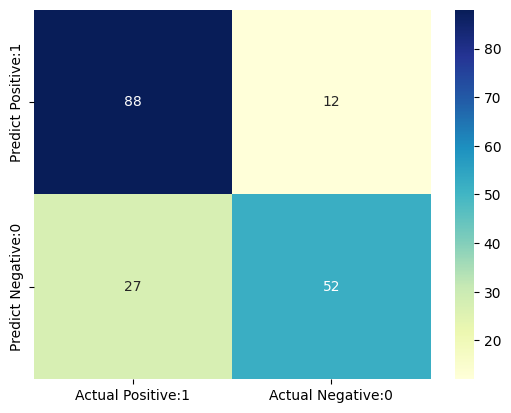

In [146]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Report

In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.81      0.66      0.73        79

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [148]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('\nClassification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('\nPrecision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('\nRecall or Sensitivity : {0:0.4f}'.format(recall))

specificity = TN / (TN + FP)
print('\nSpecificity : {0:0.4f}'.format(specificity))

true_positive_rate = TP / float(TP + FN)
print('\nTrue Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('\nFalse Positive Rate : {0:0.4f}'.format(false_positive_rate))

Classification accuracy : 0.7821

Classification error : 0.2179

Precision : 0.8800

Recall or Sensitivity : 0.7652

Specificity : 0.8125

True Positive Rate : 0.7652

False Positive Rate : 0.1875


Predictions on the test data

In [305]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [306]:
test_data = test_df.drop(['PassengerId','Name','Ticket'],axis=1)

In [307]:
test_data.shape

(418, 8)

In [308]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [309]:
test_data.Cabin = test_data.Cabin.astype('str')
test_data['Cabin_side'] = test_data.apply(lambda row: use_regex(row['Cabin']),axis=1)
test_data.drop(['Cabin'],axis=1,inplace=True)
test_data.Cabin_side.replace('n',np.NAN,inplace=True)

In [310]:
data.Cabin_side.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [311]:
categorical = [col for col in test_data.columns if test_data[col].dtypes == 'O']
print(categorical)
numerical = [col for col in test_data.columns if test_data[col].dtypes != 'O']
print(numerical)

['Sex', 'Embarked', 'Cabin_side']
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [312]:
print(test_data[numerical].isnull().sum())

Pclass     0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64


In [313]:
for df1 in [X_train, test_data]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [314]:
print(test_data[numerical].isnull().sum())

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


In [315]:
test_data[categorical].isnull().sum()

Sex             0
Embarked        0
Cabin_side    327
dtype: int64

In [316]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, test_data]:
    df2['Cabin_side'].fillna(X_train['Cabin_side'].mode()[0], inplace=True)

In [317]:
test_data[categorical].isnull().sum()

Sex           0
Embarked      0
Cabin_side    0
dtype: int64

In [318]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Cabin_side    0
dtype: int64

In [319]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, test_data]:
    df3['Pclass'] = max_value(df3, 'Pclass', 6)
    df3['Age'] = max_value(df3, 'Age', 91.625)
    df3['SibSp'] = max_value(df3, 'SibSp', 4)
    df3['Fare'] = max_value(df3, 'Fare', 100.2688)

In [320]:
test_data[numerical].describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.959330,0.425837,0.392344,27.808691
std,0.841838,12.649553,0.755794,0.981429,28.299385
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,28.750000,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.471875
max,3.000000,76.000000,4.000000,9.000000,100.268800


encoding

In [321]:
test_data[categorical].head()

,Sex,Embarked,Cabin_side
0,male,Q,C
1,female,S,C
2,male,Q,C
3,male,S,C
4,female,S,C


In [322]:
for var in categorical:
    
    print(var, ' contains ', len(test_data[var].unique()), ' levels')

Sex  contains  2  levels
Embarked  contains  3  levels
Cabin_side  contains  7  levels


In [323]:
test_data = encoder.transform(test_data)

In [324]:
test_data.head()

,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Fare,Embarked,Cabin_side
0,3,0,1,34.5,0,0,7.8292,Q,C
1,3,1,0,47.0,1,0,7.0000,S,C
2,2,0,1,62.0,0,0,9.6875,Q,C
3,3,0,1,27.0,0,0,8.6625,S,C
4,3,1,0,22.0,1,1,12.2875,S,C


In [325]:
test_data = pd.concat([test_data[numerical], test_data[['Sex_0','Sex_1']],
                     pd.get_dummies(test_data.Embarked), 
                     pd.get_dummies(test_data.Cabin_side),
                    ], axis=1)

In [326]:
test_data.shape

(418, 17)

In [359]:
test_data.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_0', 'Sex_1', 'C', 'Q',
       'S', 'A', 'B', 'C', 'D', 'E', 'F', 'G'],
      dtype='object')

In [360]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_0', 'Sex_1', 'C', 'Q',
       'S', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'],
      dtype='object')

In [361]:
missing_cols = set( X_train.columns ) - set( test_data.columns )
print(missing_cols)
# Add a missing column in test_data set with default value equal to 0
for c in missing_cols:
    test_data[c] = 0
# # Ensure the order of column in the test_data set is in the same order than in X_train set
X_train, test_data = X_train.align(test_data, axis=1)

{'T'}


In [362]:
X_train.shape,test_data.shape

((712, 18), (418, 18))

Scaling

In [363]:
cols = test_data.columns

In [364]:
test_data = scaler.transform(test_data)

In [365]:
test_data = pd.DataFrame(test_data, columns=[cols])
test_data.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_0,Sex_1,C,Q,S,A,B,C,D,E,F,G,T
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0
mean,0.632775,0.371190,0.106459,0.065391,0.277341,0.363636,0.636364,0.244019,0.110048,0.645933,0.016746,0.043062,0.866029,0.031100,0.021531,0.019139,0.002392,0.0
std,0.420919,0.158954,0.188949,0.163571,0.282235,0.481622,0.481622,0.430019,0.313324,0.478803,0.128474,0.203240,0.341030,0.173797,0.145320,0.137177,0.048912,0.0
min,0.000000,-0.003141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.283740,0.000000,0.000000,0.078746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,0.355994,0.000000,0.000000,0.144155,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,0.443956,0.250000,0.000000,0.313875,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,0.949736,1.000000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [366]:
y_pred_test = logreg.predict(test_data)
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [246]:
final_df = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':y_pred_test})

In [248]:
final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [249]:
final_df.to_csv('Predictions.csv',index=False)

Fitting full train

In [275]:
X_train.shape,X_test.shape

((712, 8), (179, 8))

In [284]:
traindata = pd.concat([X_train,X_test])

In [302]:
test_full_data = pd.concat([y_train,y_test])

In [303]:
traindata.shape,test_data.shape

((891, 18), (891,))

In [286]:
traindata.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Cabin_side    0
dtype: int64

In [292]:
traindata.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_side
30,1,male,40.0,0,0,27.7208,C,C
10,3,female,4.0,1,1,16.7000,S,G
873,3,male,47.0,0,0,9.0000,S,C
182,3,male,9.0,4,2,31.3875,S,C
876,3,male,20.0,0,0,9.8458,S,C


In [293]:
traindata.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.510572,0.485971,0.381594,27.043158
std,0.836071,13.007535,0.908496,0.806057,27.339465
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.750000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,4.000000,6.000000,100.268800


In [294]:
encoder = ce.BinaryEncoder(cols=['Sex'])
traindata = encoder.fit_transform(traindata)

In [295]:
traindata.head()

,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Fare,Embarked,Cabin_side
30,1,0,1,40.0,0,0,27.7208,C,C
10,3,1,0,4.0,1,1,16.7000,S,G
873,3,0,1,47.0,0,0,9.0000,S,C
182,3,0,1,9.0,4,2,31.3875,S,C
876,3,0,1,20.0,0,0,9.8458,S,C


In [296]:
traindata = pd.concat([traindata[numerical], traindata[['Sex_0','Sex_1']],
                     pd.get_dummies(traindata.Embarked), 
                     pd.get_dummies(traindata.Cabin_side),
                    ], axis=1)

In [297]:
traindata.shape

(891, 18)

In [299]:
traindata.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_0', 'Sex_1', 'C', 'Q',
       'S', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'],
      dtype='object')

In [300]:
cols = traindata.columns
traindata = scaler.fit_transform(traindata)
traindata = pd.DataFrame(traindata, columns=[cols])
traindata.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_0,Sex_1,C,Q,S,A,B,C,D,E,F,G,T
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.365551,0.121493,0.063599,0.269707,0.352413,0.647587,0.188552,0.086420,0.725028,0.016835,0.052750,0.837262,0.037037,0.035915,0.014590,0.004489,0.001122
std,0.418036,0.163452,0.227124,0.134343,0.272662,0.477990,0.477990,0.391372,0.281141,0.446751,0.128725,0.223659,0.369334,0.188959,0.186182,0.119973,0.066890,0.033501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.078892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.355994,0.000000,0.000000,0.144155,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.434531,0.250000,0.000000,0.309169,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [304]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2','elasticnet']}, {'solver':['liblinear','sag','saga']},
              {'C':[0.01,0.1,1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(traindata, test_full_data)

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\shara\AppData\Local\Programs\Python

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet']},
                         {'solver': ['liblinear', 'sag', 'saga']},
                         {'C': [0.01, 0.1, 1, 10, 100, 1000]}],
             scoring='accuracy')

In [368]:
print(grid_search.best_params_)

{'C': 0.01}


In [367]:
y_pred_test = grid_search.predict(test_data)
y_pred_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [369]:
final_df = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':y_pred_test})
final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [370]:
final_df.to_csv('Predictions-fulldata.csv',index=False)